### Density Based Spatial Clustering of Application with Noise (DBSCAN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
np.random.seed(42)

def PointsInCircum(r, n = 100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30, 30), +
             math.sin(2*math.pi/n*x)*r+np.random.normal(-30, 30)) for x in range(1, n+1)]

In [3]:
#creating data points in the form of a circle
df = pd.DataFrame(PointsInCircum(500, 1000))

df = df.append(PointsInCircum(300, 700))

df = df.append(PointsInCircum(100, 300))

In [4]:
#Adding noise to the dataset
df = df.append([(np.random.randint(-600, 600),
                np.random.randint(-600, 600)) for i in range(100)])
df.head(5)

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181


In [5]:
from sklearn.cluster import DBSCAN

In [6]:
dbscan = DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN()

By default eps = 0.5 and min_samples = 5

Text(0, 0.5, 'Feature 2')

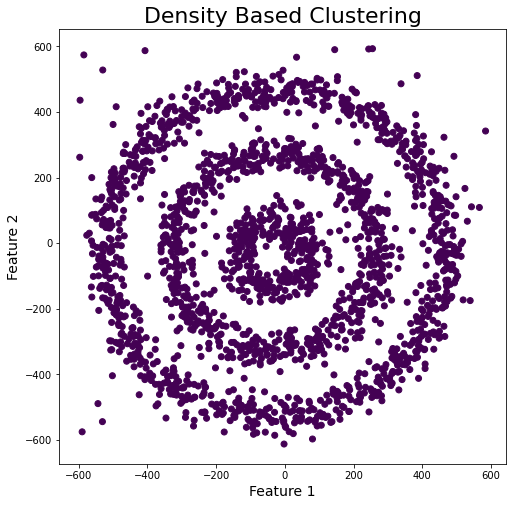

In [7]:
df['dbscan_labels'] = dbscan.labels_

#Plotting resulting clusters
plt.figure(figsize = (8, 8))
plt.scatter(df[0], df[1], c = df['dbscan_labels'])
plt.title('Density Based Clustering', fontsize = 22)
plt.xlabel('Feature 1', fontsize = 14)
plt.ylabel('Feature 2', fontsize = 14)

In [8]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

The distance variable contains an array of distances between a data
point and its nearest data point for all data points in the dataset.

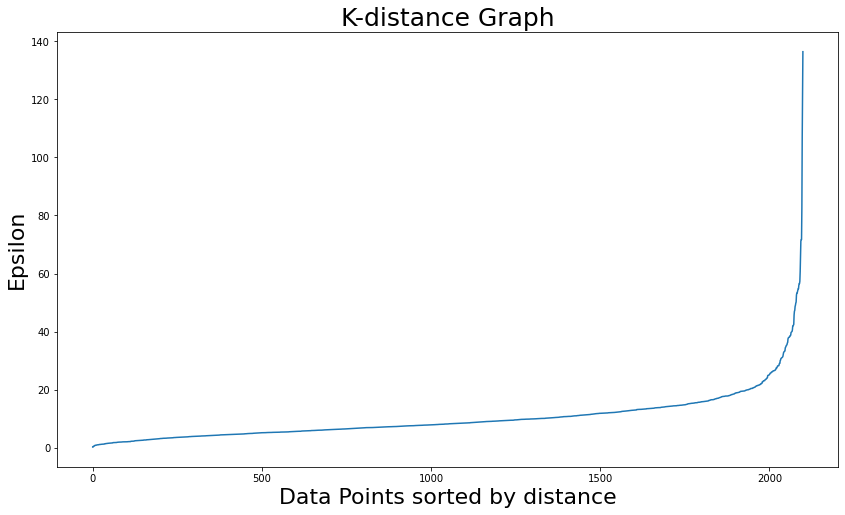

In [9]:
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.figure(figsize = (14, 8))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 25)
plt.xlabel('Data Points sorted by distance', fontsize = 22)
plt.ylabel('Epsilon', fontsize = 22)
plt.show()

In [10]:
dbscan = DBSCAN(eps = 30, min_samples = 4)
dbscan.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=4)

Text(0, 0.5, 'Feature 2')

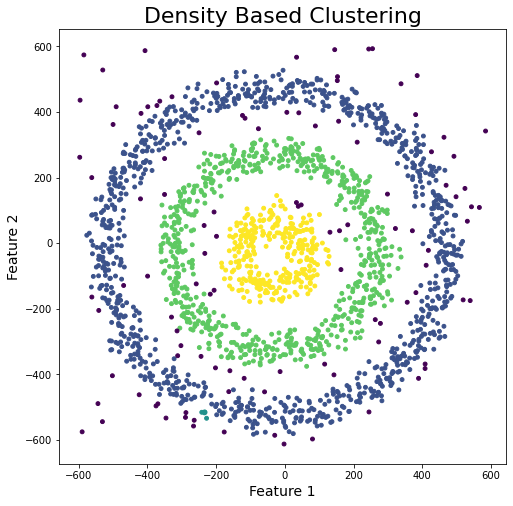

In [11]:
df['dbscan_labels'] = dbscan.labels_

#Plotting resulting clusters
plt.figure(figsize = (8, 8))
plt.scatter(df[0], df[1], c = df['dbscan_labels'], s = 15)
plt.title('Density Based Clustering', fontsize = 22)
plt.xlabel('Feature 1', fontsize = 14)
plt.ylabel('Feature 2', fontsize = 14)